# Gym Record
## by Alice Parker
##### I've copied and pasted the data from the my Trento app which records when I enter and exit the gym. I've cleaned the data, taking into times I've entered the gym and left quickly because I'd left something in the car. The aim is to visualise how much time I actually spend in the gym, and how often I go. The exercise is a simple brain teaser to keep my coding skills up whilst I write my thesis (in other words: procrastination)

## Import Libraries

In [304]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

## Import Data

In [305]:
df = pd.read_csv ('Gym.csv', sep=';')
# Dataset is copied and pasted from Trento app into Excel and converted into a csv file.

In [306]:
df

,Dato,Senter,Type
0,10.11.2021 19.31.50,Trento Eidsvoll,Utgang
1,10.11.2021 19.31.50,Trento Eidsvoll,Utgang
2,10.11.2021 18.49.21,Trento Eidsvoll,Inngang
3,09.11.2021 20.14.21,Trento Eidsvoll,Utgang
4,09.11.2021 19.34.05,Trento Eidsvoll,Inngang
5,09.11.2021 19.33.41,Trento Eidsvoll,Utgang
6,09.11.2021 19.33.08,Trento Eidsvoll,Inngang
7,09.11.2021 19.33.07,Trento Eidsvoll,Inngang
8,07.11.2021 14.40.31,Trento Eidsvoll,Utgang
9,07.11.2021 14.15.53,Trento Eidsvoll,Inngang


# Cleaning data

In [307]:
df = df.drop(['Senter'], axis=1)

In [308]:
df.dtypes

Dato    object
Type    object
dtype: object

In [309]:
# Changing dato format to datetime.
df['Dato'] = pd.to_datetime(df['Dato'], format='%d.%m.%Y %H.%M.%S')
df.dtypes

Dato    datetime64[ns]
Type            object
dtype: object

In [310]:
df

,Dato,Type
0,2021-11-10 19:31:50,Utgang
1,2021-11-10 19:31:50,Utgang
2,2021-11-10 18:49:21,Inngang
3,2021-11-09 20:14:21,Utgang
4,2021-11-09 19:34:05,Inngang
5,2021-11-09 19:33:41,Utgang
6,2021-11-09 19:33:08,Inngang
7,2021-11-09 19:33:07,Inngang
8,2021-11-07 14:40:31,Utgang
9,2021-11-07 14:15:53,Inngang


In [311]:
# Remove rows where I have double tapped the card. This is based on two consecutive 'type' values.  
df = df.loc[df['Type'].shift() != df['Type']]
df

,Dato,Type
0,2021-11-10 19:31:50,Utgang
2,2021-11-10 18:49:21,Inngang
3,2021-11-09 20:14:21,Utgang
4,2021-11-09 19:34:05,Inngang
5,2021-11-09 19:33:41,Utgang
6,2021-11-09 19:33:08,Inngang
8,2021-11-07 14:40:31,Utgang
9,2021-11-07 14:15:53,Inngang
10,2021-11-05 10:54:40,Utgang
11,2021-11-05 10:14:42,Inngang


In [312]:
# Switch from new-old to old-new entries
df = df.iloc[::-1]
df

,Dato,Type
25,2021-08-27 14:55:50,Inngang
24,2021-08-27 15:58:10,Utgang
23,2021-08-30 09:04:17,Inngang
22,2021-08-30 09:55:52,Utgang
21,2021-09-02 14:37:41,Inngang
20,2021-09-02 15:38:39,Utgang
19,2021-09-06 09:37:16,Inngang
18,2021-09-06 10:32:30,Utgang
17,2021-09-06 10:33:40,Inngang
16,2021-09-06 10:33:58,Utgang


In [313]:
# Ignored the warning, created a timedelta value
df['time_delta'] = df['Dato'] - df['Dato'].shift()

<ipython-input-313-f37a3fa2da84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_delta'] = df['Dato'] - df['Dato'].shift()


In [314]:
df

,Dato,Type,time_delta
25,2021-08-27 14:55:50,Inngang,NaT
24,2021-08-27 15:58:10,Utgang,0 days 01:02:20
23,2021-08-30 09:04:17,Inngang,2 days 17:06:07
22,2021-08-30 09:55:52,Utgang,0 days 00:51:35
21,2021-09-02 14:37:41,Inngang,3 days 04:41:49
20,2021-09-02 15:38:39,Utgang,0 days 01:00:58
19,2021-09-06 09:37:16,Inngang,3 days 17:58:37
18,2021-09-06 10:32:30,Utgang,0 days 00:55:14
17,2021-09-06 10:33:40,Inngang,0 days 00:01:10
16,2021-09-06 10:33:58,Utgang,0 days 00:00:18


In [315]:
# Removed the rows of entry/'inngang'
df = df[df['Type'] == 'Utgang']
df

,Dato,Type,time_delta
24,2021-08-27 15:58:10,Utgang,01:02:20
22,2021-08-30 09:55:52,Utgang,00:51:35
20,2021-09-02 15:38:39,Utgang,01:00:58
18,2021-09-06 10:32:30,Utgang,00:55:14
16,2021-09-06 10:33:58,Utgang,00:00:18
14,2021-09-11 18:00:59,Utgang,00:35:26
12,2021-11-03 19:35:37,Utgang,00:43:27
10,2021-11-05 10:54:40,Utgang,00:39:58
8,2021-11-07 14:40:31,Utgang,00:24:38
5,2021-11-09 19:33:41,Utgang,00:00:33


In [316]:
# Removed anomalies. 5 minutes is not a work out.
df = df[df['time_delta'] > '00:05:00']

In [317]:
# Drop the type column as it is no longer needed.
df = df.drop(columns=['Type'])
df

,Dato,time_delta
24,2021-08-27 15:58:10,01:02:20
22,2021-08-30 09:55:52,00:51:35
20,2021-09-02 15:38:39,01:00:58
18,2021-09-06 10:32:30,00:55:14
14,2021-09-11 18:00:59,00:35:26
12,2021-11-03 19:35:37,00:43:27
10,2021-11-05 10:54:40,00:39:58
8,2021-11-07 14:40:31,00:24:38
3,2021-11-09 20:14:21,00:40:16
0,2021-11-10 19:31:50,00:42:29


In [318]:
# Added a col displaying timedelta in minutes - better supported by visualisation tools.
df['mins'] = df['time_delta'].apply(lambda x: x.total_seconds()/60)
df

,Dato,time_delta,mins
24,2021-08-27 15:58:10,01:02:20,62.333333
22,2021-08-30 09:55:52,00:51:35,51.583333
20,2021-09-02 15:38:39,01:00:58,60.966667
18,2021-09-06 10:32:30,00:55:14,55.233333
14,2021-09-11 18:00:59,00:35:26,35.433333
12,2021-11-03 19:35:37,00:43:27,43.450000
10,2021-11-05 10:54:40,00:39:58,39.966667
8,2021-11-07 14:40:31,00:24:38,24.633333
3,2021-11-09 20:14:21,00:40:16,40.266667
0,2021-11-10 19:31:50,00:42:29,42.483333


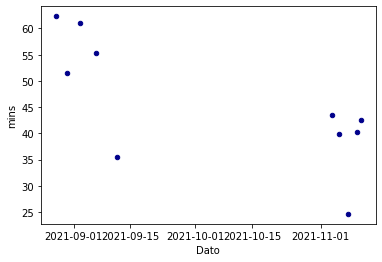

In [320]:
# Create a basic scatterplot
ax1 = df.plot.scatter(x='Dato', y='mins',c='DarkBlue')